<a href="https://colab.research.google.com/github/yujin0210/esaa/blob/main/ESAA4%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Seaborn 라이브러리 - 고급 그래프 도구

- Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급버전
- 먼저 Seaborn 라이브러리를 설치

In [ ]:
#라이브러리 불러오기
import seaborn as sns

#titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

### - 회귀선이 있는 산점도

- regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄
- fit_reg=False 옵션을 설정하면 회귀선을 안보이게 할 수 있음

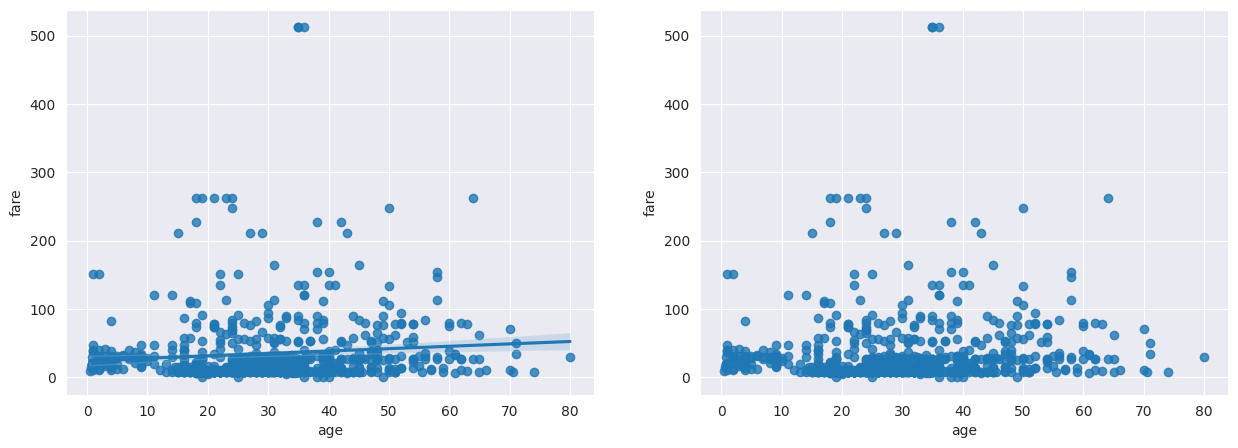

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시 (fit_reg=True)
sns.regplot(x='age', #x축 변수
            y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax1) #axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age', #x축 변수
            y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax2, #axe 객체- 2번째 그래프
            fit_reg=False) #회귀선 미표시)

plt.show()

### -히스토그램/커널 밀도 그래프

- 단변수(하나의 변수)데이터의 분포를 확인할 때 displot() 함수를 이용
- hist=False 옵션을 추가하면 히스토그램이 표시되지 않음
-kde=False 옵션을 전달하면 커널 밀도 그래프를 표시하지 않음


- 밀도 그래프 : displot()
- 히스토그램 : hisplot()


<ipython-input-6-654a2778a810>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


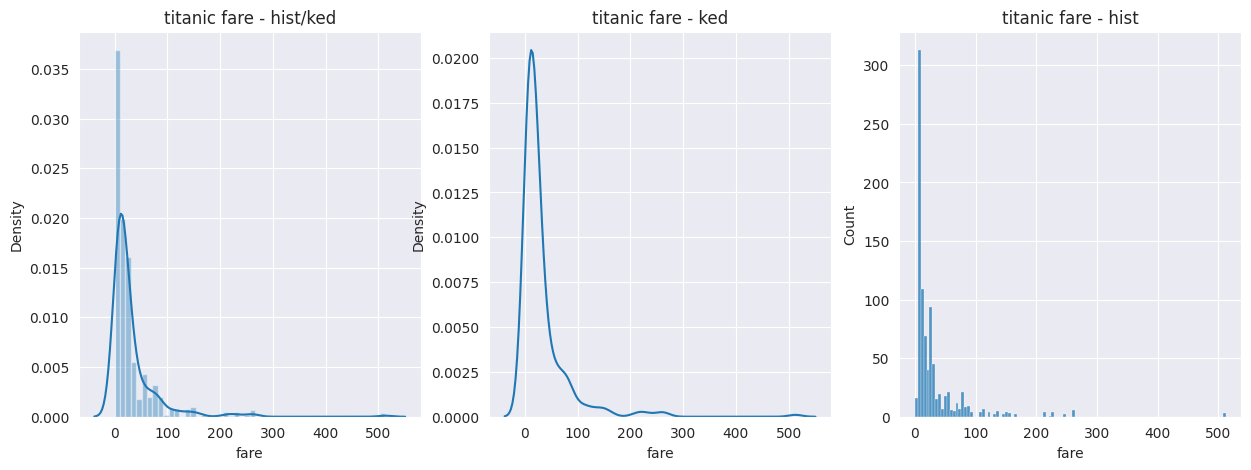

In [ ]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'], ax=ax1)

#kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

#histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### - 히트맵

-Seaborn 라이브러리는 히트맵을 그리는 heatmap() 메소드를 제공
-2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류
-데이터프레임을 피벗테이블로 정리할 때 한 변수를 행 인덱스로, 나머지 변수를 열이름으로 설정
-aggfunc = 'size'옵션은 데이터 값의 크기를 기준으로 집계

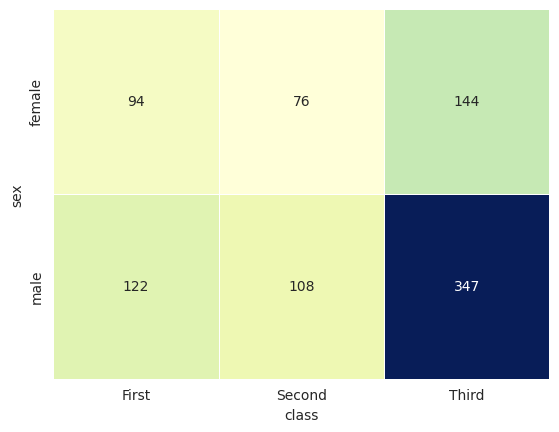

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table=titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

#히트맵 그리기
sns.heatmap(table, #데이터프레임
            annot=True, fmt='d', #데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu', #컬러맵
            linewidth=.5, #구분선
            cbar=False) #컬러바 표시여부

plt.show()

### - 범주형 데이터의 산점도

-stripplot(), swarmplot() 함수를 사용
-swarmplot() 함수는 데이터의 분산까지 고려, 데이터 포인트가 중복되지 않게 그림

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


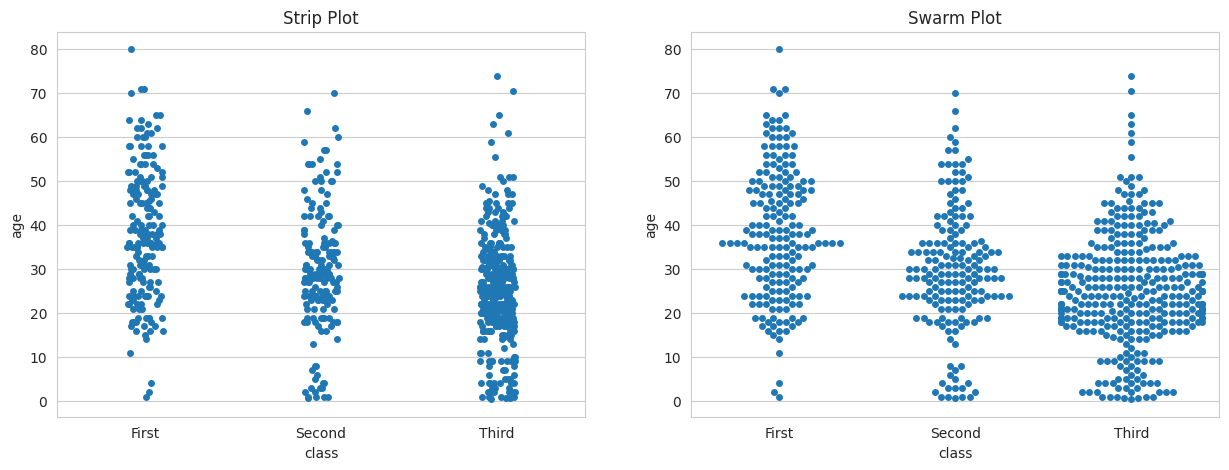

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset('titanic')

#스타일 테마 설정
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 함)
sns.stripplot(x='class', #x축 변수
              y = 'age', #y축 변수
              data=titanic, #데이터셋 - 데이터프레임
              ax=ax1) #axe 객체 - 1번째 그래프

#이산형 변수의 분포 - 데이터 분산 고려(중복표시 안함)
sns.swarmplot(x='class', #x축 변수
              y = 'age', #y축 변수
              data=titanic, #데이터셋 - 데이터프레임
              ax=ax2) #axe 객체 - 2번째 그래프

#차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

### - 막대 그래프
-barplot()


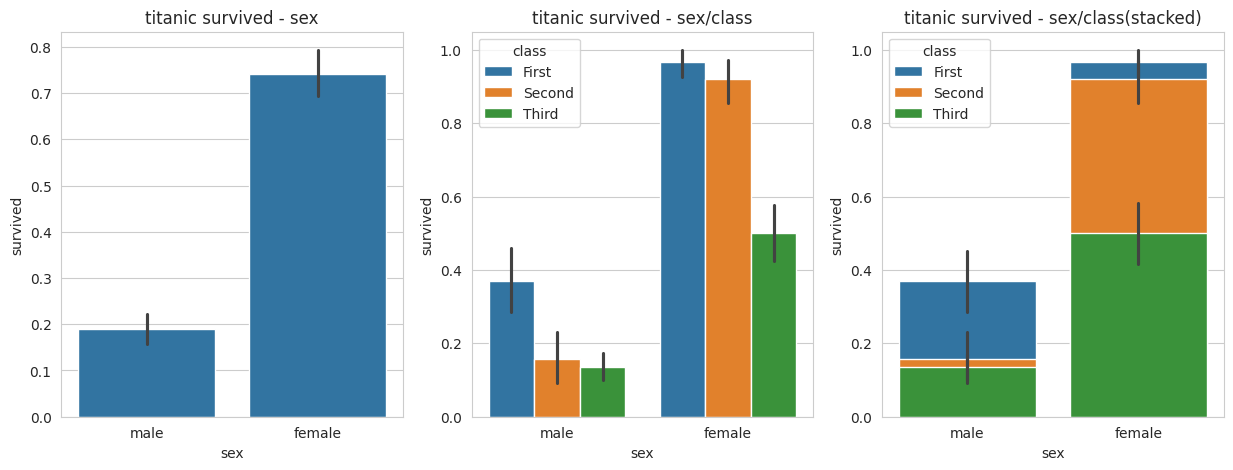

In [ ]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축, y축 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### - 빈도 그래프

- countplot() : 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄

<ipython-input-13-fa9f804d9b16>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)


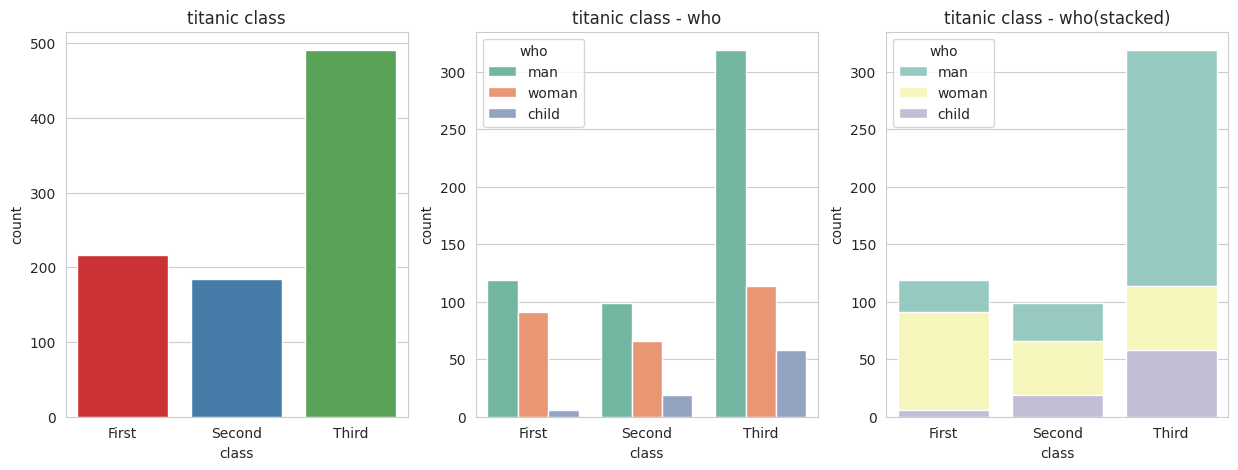

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### - 박스 플롯 / 바이올린 그래프

-boxplot()
-violinplot()


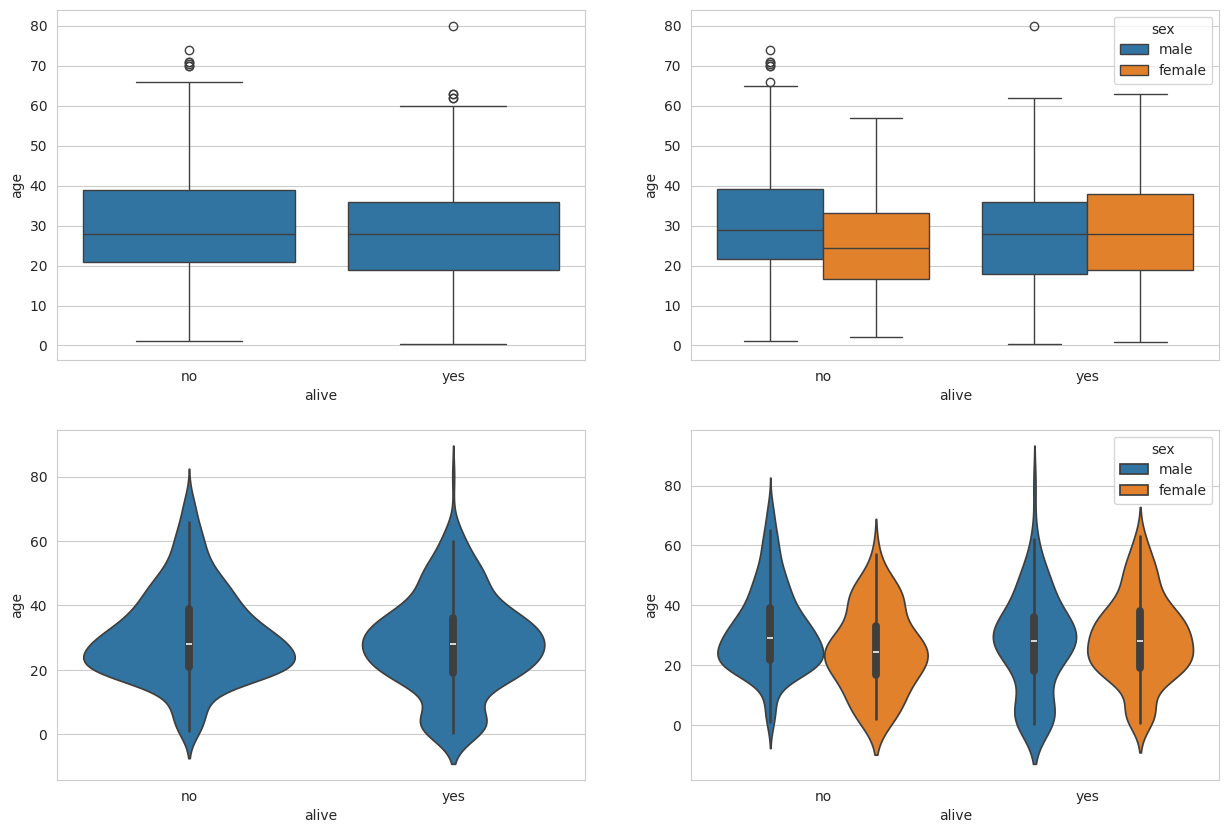

In [ ]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 4개의 서브플롯 생성)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#박스플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

#바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

#박스 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

#바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

### - 조인트 그래프

- jointplot() 함수는 산점도를 기본으로 표시
- 산점도(기본값), 회귀선 추가(kind='reg'), 육각 산점도(kind='hex'), 커널 밀집 그래프(kind='kde')

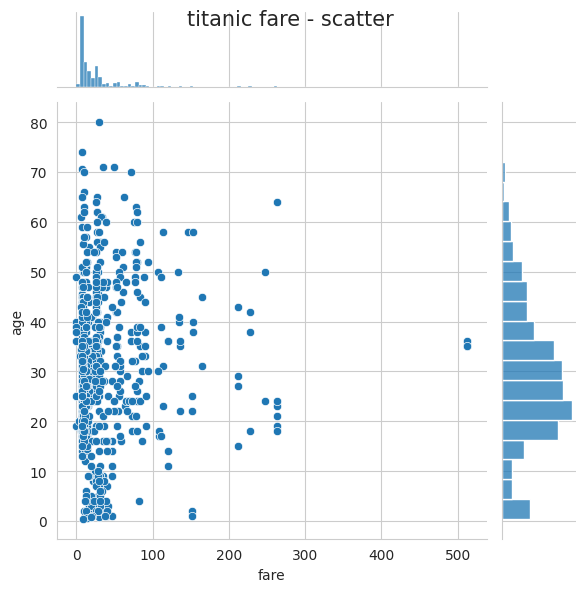

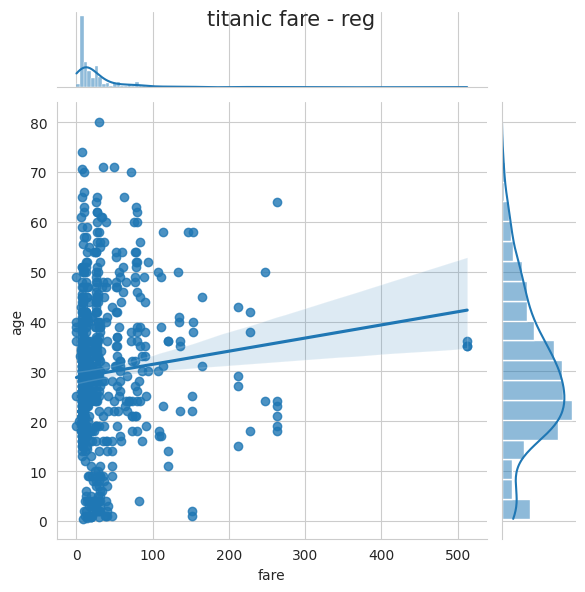

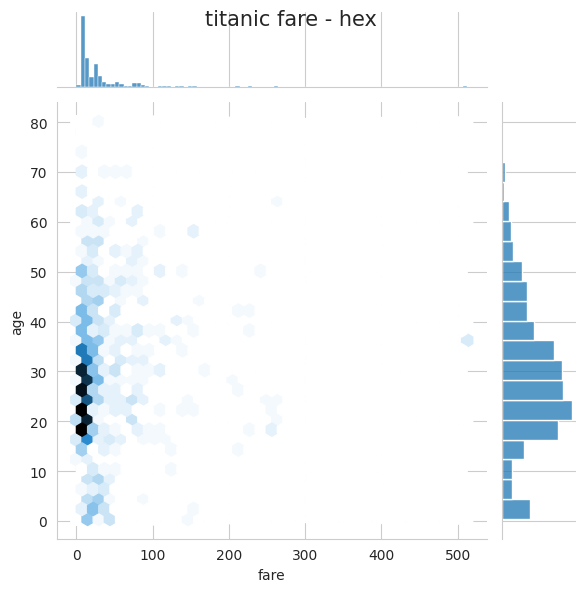

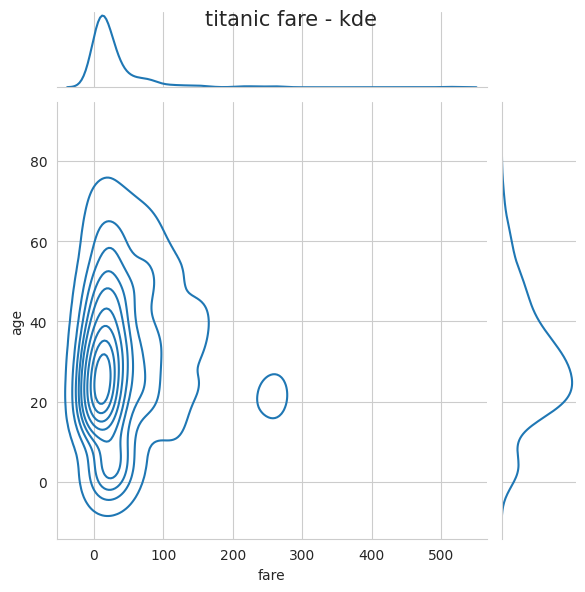

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)
plt.show()

### - 조건을 적용하여 화면을 그리드로 분할하기

- Facetgrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다.
- 서브 플롯에 적용할 그래프 종류를 map() 메소드를 이용해 그리드 객체에 전달


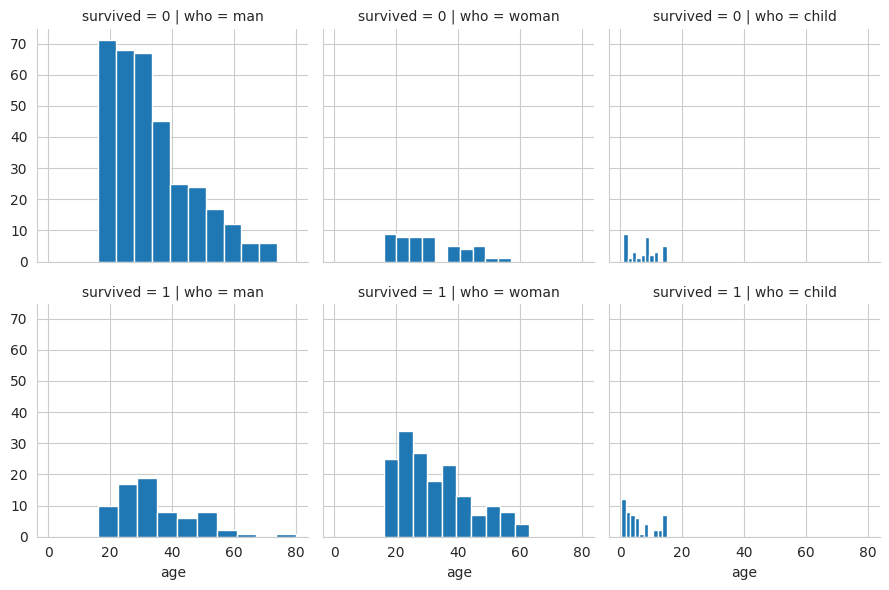

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g=sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g=g.map(plt.hist, 'age')

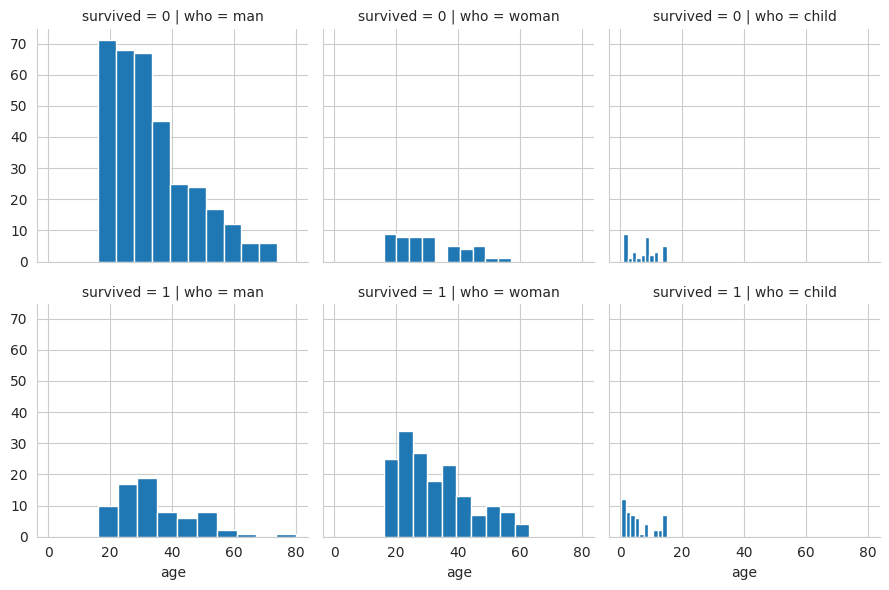

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조건에 따라 그리드 나누기
g=sns.FacetGrid(data=titanic, col='who', row='survived')

#그래프 적용하기
g=g.map(plt.hist, 'age')

### - 이변수 데이터의 분포

- pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.


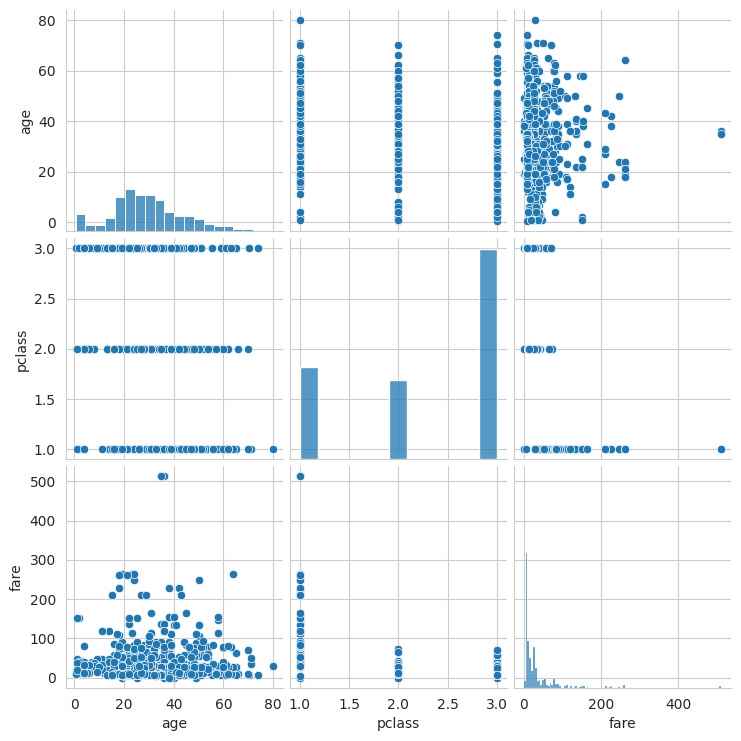

In [ ]:
#titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair=titanic[['age','pclass', 'fare']]

#조건에 따라 그리드 나누기
g=sns.pairplot(titanic_pair)

### 3. Folium 라이브러리 - 지도 활용

-map() 함수를 이용하여 간단하게 지도 객체 만들기
-웹 기반 지도임
-save() 메소드를 적용해 html 파일로 저장, 웹브라우저에서 파일을 열어 확인


In [ ]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map=folium.Map(location=[37.55,126.98], zoom_start=12)

#지도를 html 파일로 저장하기
seoul_map.save('./seoul.html')

### - 지도 스타일 적용하기

-map() 함수에 tiles 옵션을 적용하여 스타일을 변경

In [ ]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=15)

#지도를 html 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')


### - 지도에 마커 표시하기
- Marker() 함수에 위도, 경도 정보를 전달
- popup옵션을 추가 -> 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있음

In [ ]:
#라이브러리 불러오기
import pandas as pd
import folium

#대학교 리스트를 데이터프레임으로 변환
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_excel('/content/서울지역 대학교 위치.xlsx', engine='openpyxl')

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

#대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):folium.Marker([lat,lng], popup=name).add_to(seoul_map)

#지도를 html 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### - 지도에 원형 마커 표시
- Marker() 대신 CircleMarker() 함수 사용

In [ ]:
#대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index,df.위도, df.경도):
  folium.CircleMarker([lat,lng],
                      radius=10, #원의 반지름
                      color='brown', #원의 둘레 색상
                      fill=True,
                      fill_color='coral', #원을 채우는 색
                      fill_opacity=0.7, #투명도
                      popup=name).add_to(seoul_map)

#지도를 html 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

### - 지도 영역에 단계구분도 표시하기

- Choropleth()함수를 이용

In [2]:
import pandas as pd
import folium
import json

#경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_excel('/content/경기도인구데이터.xlsx')
df.columns = df.columns.map(str)

#경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '/content/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

#경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],
                   tiles='Stamen Terrain', zoom_start=9)

#출력할 연도 선택(2007~2017년 중에서 선택)
year='2007'

#Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data, #지도 경계
                  data = df[year], #표시하려는 데이터
                  columns = [df.index, df[year]], #열지정
                  fill_color='YlOrRd', fill_opacity=0.7,line_opacity=0.3,
                  thereshole_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name',).add_to(g_map)

#지도를 html 파일로 저장하기
g_map.save('./gyonggi_population_' + year + '.html')

Mounted at /content/drive
